In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt

In [ ]:
path = "dataset2-1.csv"
df = pd.read_csv(path)

### Count the number of cows in the dataset

In [ ]:
num_cows = df['cow'].nunique()
print(f"Total number of unique cows: {num_cows}")

Total number of unique cows: 28


### Display the ids of cows

In [ ]:
unique_cow_ids = df['cow'].unique()
print("List of unique cow IDs:")
print(unique_cow_ids)  # Prints all IDs as an array

sorted_cow_ids = sorted(df['cow'].unique())
print("\nSorted list of cow IDs:")
print(sorted_cow_ids)

List of unique cow IDs:
[7163 8200 8605 8677 9195  151  153  156  162  173  189 1177 1624 2152
 2155 2158 2162 2164 2165 2170 2175 2179 2182 2183 2185 2187 2603 2622]

Sorted list of cow IDs:
[np.int64(151), np.int64(153), np.int64(156), np.int64(162), np.int64(173), np.int64(189), np.int64(1177), np.int64(1624), np.int64(2152), np.int64(2155), np.int64(2158), np.int64(2162), np.int64(2164), np.int64(2165), np.int64(2170), np.int64(2175), np.int64(2179), np.int64(2182), np.int64(2183), np.int64(2185), np.int64(2187), np.int64(2603), np.int64(2622), np.int64(7163), np.int64(8200), np.int64(8605), np.int64(8677), np.int64(9195)]


### Detect outliers of features

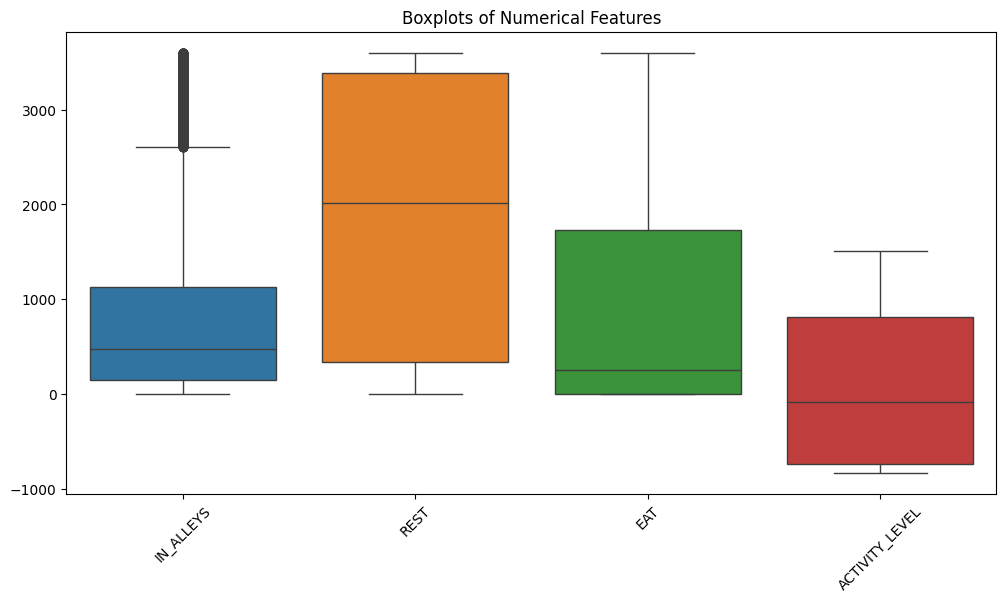

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns for outlier analysis
numerical_cols = ['IN_ALLEYS', 'REST', 'EAT', 'ACTIVITY_LEVEL']

# Plot boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numerical_cols])
plt.title('Boxplots of Numerical Features')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Calculate IQR for each numerical column
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"\nOutliers in {col}: {len(outliers)}")
    print(outliers[['cow', 'date', 'hour', col]].head())  # Show sample outliers


Outliers in IN_ALLEYS: 1585
      cow        date  hour  IN_ALLEYS
8    7163  2015-03-02     9   2627.864
14   7163  2015-03-02    15   2674.217
62   7163  2015-03-04    15   2964.164
102  7163  2015-03-06     7   2736.628
110  7163  2015-03-06    15   3079.911

Outliers in REST: 0
Empty DataFrame
Columns: [cow, date, hour, REST]
Index: []

Outliers in EAT: 0
Empty DataFrame
Columns: [cow, date, hour, EAT]
Index: []

Outliers in ACTIVITY_LEVEL: 0
Empty DataFrame
Columns: [cow, date, hour, ACTIVITY_LEVEL]
Index: []


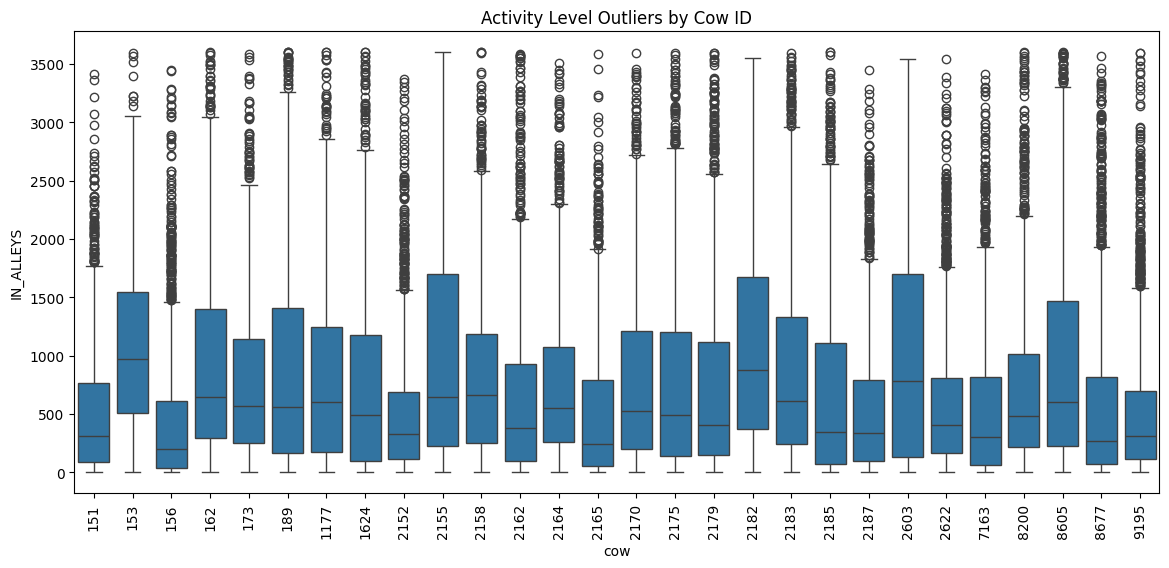

In [ ]:
plt.figure(figsize=(14, 6))
sns.boxplot(x='cow', y='IN_ALLEYS', data=df)
plt.title('Activity Level Outliers by Cow ID')
plt.xticks(rotation=90)
plt.show()

## Check missing days

### Check Date Range and Missing Dates

In [ ]:
# Convert 'date' to datetime
df['date'] = pd.to_datetime(df['date'])

# Get min/max dates
min_date = df['date'].min()
max_date = df['date'].max()
print(f"Date range: {min_date} to {max_date}")

# Generate all expected dates in the range
all_dates = pd.date_range(start=min_date, end=max_date, freq='D')
print(f"Total expected days: {len(all_dates)}")

# Check missing dates
missing_dates = all_dates.difference(df['date'].unique())
print(f"\nMissing dates {len(missing_dates)}:", ', '.join(missing_dates.strftime('%Y-%m-%d')))


Date range: 2015-03-02 00:00:00 to 2015-04-30 00:00:00
Total expected days: 60

Missing dates 0: 


### Check Completeness per Cow

In [ ]:
# Find missing days for each cow
missing_days = {}
for cow_id in df['cow'].unique():
    cow_dates = df[df['cow'] == cow_id]['date'].unique()
    missing_days[cow_id] = all_dates.difference(cow_dates)

# Display missing days for each cow
for cow_id, days in missing_days.items():
    if len(days) > 0:
        print(f"Cow {cow_id} is missing the following days:")
        print(', '.join(days.strftime('%Y-%m-%d')))

Cow 1177 is missing the following days:
2015-03-08, 2015-03-09, 2015-03-10


### The number of hourly entries per cow per day

In [ ]:
hourly_counts = df.groupby(['cow', 'date']).size().reset_index(name='hourly_records')
hourly_counts_1177 = hourly_counts[hourly_counts['cow'] == 1177]
print(hourly_counts_1177)

      cow       date  hourly_records
360  1177 2015-03-02              24
361  1177 2015-03-03              24
362  1177 2015-03-04              24
363  1177 2015-03-05              24
364  1177 2015-03-06              23
365  1177 2015-03-07              24
366  1177 2015-03-11              24
367  1177 2015-03-12              24
368  1177 2015-03-13              24
369  1177 2015-03-14              24
370  1177 2015-03-15              24
371  1177 2015-03-16              24
372  1177 2015-03-17              24
373  1177 2015-03-18              24
374  1177 2015-03-19              24
375  1177 2015-03-20              24
376  1177 2015-03-21              24
377  1177 2015-03-22              24
378  1177 2015-03-23              24
379  1177 2015-03-24              24
380  1177 2015-03-25              24
381  1177 2015-03-26              24
382  1177 2015-03-27              24
383  1177 2015-03-28              24
384  1177 2015-03-29              24
385  1177 2015-03-30              24
3

In [ ]:
# Filter for the specific cow and date with missing hours
missing_hours_data = df[(df['cow'] == 1177) & (df['date'] == '2015-03-06')]

# Identify the missing hour(s)
all_hours = set(range(1, 25))  # Expected hours in a day
recorded_hours = set(missing_hours_data['hour'])
missing_hours = all_hours - recorded_hours

print(f"Missing hour(s) for cow 1177 on 2015-03-06: {sorted(missing_hours)}")

Missing hour(s) for cow 1177 on 2015-03-06: [13]


### Filter for days with exactly 24 hours records

In [ ]:
print("All days:", hourly_counts.shape[0])
full_days = hourly_counts[hourly_counts['hourly_records'] == 24]
print(f"\nDays with full days of records: {len(full_days)}")

if len(full_days) < hourly_counts.shape[0]:
    missing_hours = hourly_counts[hourly_counts['hourly_records'] < 24]
    print("Missing days are", missing_hours)


All days: 1677

Days with full days of records: 1676
Missing days are       cow       date  hourly_records
364  1177 2015-03-06              23


### The number of full 24-hour days per cow

In [ ]:
full_days_per_cow = full_days.groupby('cow').size().reset_index(name='full_24h_days')
print("\nFull 24h days per cow:", full_days_per_cow)


Full 24h days per cow:      cow  full_24h_days
0    151             60
1    153             60
2    156             60
3    162             60
4    173             60
5    189             60
6   1177             56
7   1624             60
8   2152             60
9   2155             60
10  2158             60
11  2162             60
12  2164             60
13  2165             60
14  2170             60
15  2175             60
16  2179             60
17  2182             60
18  2183             60
19  2185             60
20  2187             60
21  2603             60
22  2622             60
23  7163             60
24  8200             60
25  8605             60
26  8677             60
27  9195             60


In [ ]:
print(f"Percentage of complete days: {len(full_days)/len(hourly_counts)*100:.2f}%")

Percentage of complete days: 99.94%


### Count how many 24h samples have less than 12 observations

In [ ]:
less_than_12_obs = hourly_counts[hourly_counts['hourly_records'] < 12]
print(f"Number of cow-day combinations with less than 12 hourly records: {len(less_than_12_obs)}")

if len(less_than_12_obs) > 0:
    print(less_than_12_obs)



Number of cow-day combinations with less than 12 hourly records: 0


# We will execute this code on the dataset that has 24h with less than 12 observations

In [ ]:
df_filtered = df.copy()
if len(less_than_12_obs) > 0:
    #Filter for valid cow-date combinations (at least 12 hourly records)
    valid_days = hourly_counts[hourly_counts['hourly_records'] >= 12]

    #Merge back to original data to keep only valid records
    df_filtered = pd.merge(df, valid_days[['cow', 'date']], on=['cow', 'date'], how='inner')

    # df_filtered now excludes cow-date combos with <12 hours
    print(df_filtered)

## Make One Hour Shift

In [ ]:
condition_columns = ['oestrus', 'calving', 'lameness', 'mastitis', 'LPS',
                    'acidosis', 'other_disease', 'accidents', 'disturbance',
                    'mixing']

window_size = 24
shift = 1

grouped = df.sort_values(['cow', 'date', 'hour']).groupby('cow')
shifted_windows = []

for cow_id, group in grouped:
    activity = group['ACTIVITY_LEVEL'].values
    for i in range(0, len(activity) - window_size + 1, shift):
        window = activity[i:i + window_size]
        last_hour_index = i + window_size - 1
        if last_hour_index < len(group):
            conditions = group.iloc[last_hour_index][condition_columns].to_dict()
            shifted_windows.append({
                'cow': cow_id,
                'date': group.iloc[i]['date'],
                'start_hour': group.iloc[i]['hour'],
                'activity_window': window.tolist(),
                **conditions
            })

shifted_df = pd.DataFrame(shifted_windows)

print("\nDataFrame info:")
print(f"Total windows created: {len(shifted_df)}")
print("\nFirst 3 windows:")
display(shifted_df.head(3))
print("\nColumn details:")
display(shifted_df.info())



DataFrame info:
Total windows created: 39603

First 3 windows:


cow       date  start_hour  \
0  151 2015-03-02           1   
1  151 2015-03-02           2   
2  151 2015-03-02           3   

                                     activity_window  oestrus  calving  \
0  [-640.89462, -817.46938, -821.62874, -337.2486...        0        0   
1  [-817.46938, -821.62874, -337.24867, -543.6490...        0        0   
2  [-821.62874, -337.24867, -543.64907, 779.16592...        0        0   

   lameness  mastitis  LPS  acidosis  other_disease  accidents  disturbance  \
0         0         0  NaN         0              0          0            1   
1         0         0  NaN         1              0          0            1   
2         0         0  NaN         1              0          0            1   

   mixing  
0       0  
1       0  
2       0


Column details:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39603 entries, 0 to 39602
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   cow              39603 non-null  int64         
 1   date             39603 non-null  datetime64[ns]
 2   start_hour       39603 non-null  int64         
 3   activity_window  39603 non-null  object        
 4   oestrus          39603 non-null  int64         
 5   calving          39603 non-null  int64         
 6   lameness         39603 non-null  int64         
 7   mastitis         39603 non-null  int64         
 8   LPS              0 non-null      float64       
 9   acidosis         39603 non-null  int64         
 10  other_disease    39603 non-null  int64         
 11  accidents        39603 non-null  int64         
 12  disturbance      39603 non-null  int64         
 13  mixing           39603 non-null  int64         
dtypes: datetime64[ns](1),

None

### Calculate the 32 features

In [ ]:
import numpy as np
from scipy import stats, fft
import pandas as pd

def calculate_all_features(activity_windows):
    """
    Calculate all 32 features for each 24-hour activity window.
    Returns a DataFrame with one row per window and 32 feature columns.
    as in the doc paragraph 2.2 considering table 3
    """
    features = []

    for window in activity_windows:
        try:
            window = np.array(window)
            if len(window) != 24:
                raise ValueError("Window must contain exactly 24 hours of data")

            feature_dict = {}

            # =============================================
            # Time-Domain Features (1-17)
            # =============================================

            # Basic statistics (1-5)
            feature_dict['Minimum'] = np.min(window)
            feature_dict['Maximum'] = np.max(window)
            feature_dict['Mean'] = np.mean(window)
            feature_dict['RMS'] = np.sqrt(np.mean(np.square(window)))
            feature_dict['STD'] = np.std(window)

            # 6-hour window statistics (6-7)
            six_h_windows = [window[i*6:(i+1)*6] for i in range(4)]
            stds_6h = [np.std(w) for w in six_h_windows]
            means_6h = [np.mean(w) for w in six_h_windows]
            feature_dict['MeanSTD6h'] = np.mean(stds_6h)
            feature_dict['STDMean6h'] = np.std(means_6h)

            # Successive differences (9)
            diffs = np.diff(window)
            feature_dict['RMSSD'] = np.sqrt(np.mean(np.square(diffs)))

            # Distribution characteristics (10-17)
            feature_dict['Mode'] = stats.mode(window, keepdims=True)[0][0] if len(window) > 0 else np.nan
            feature_dict['Q10'] = np.percentile(window, 10)
            feature_dict['Q90'] = np.percentile(window, 90)
            feature_dict['Q25'] = np.percentile(window, 25)
            feature_dict['Q50'] = np.percentile(window, 50)
            feature_dict['Q75'] = np.percentile(window, 75)
            feature_dict['Skewness'] = stats.skew(window)
            feature_dict['Kurtosis'] = stats.kurtosis(window)

            # =============================================
            # Autocorrelation Features (18-28)
            # =============================================
            for lag in range(1, 12):
                if len(window) > lag:
                    corr = np.corrcoef(window[:-lag], window[lag:])[0,1]
                else:
                    corr = np.nan
                feature_dict[f'Autocorr{lag}'] = corr

            # =============================================
            # Frequency-Domain Features (29-32)
            # =============================================
            fft_result = np.abs(fft.fft(window))
            harmonics = fft_result[1:5]  # Skip 0-frequency, take harmonics 1-4
            for i, h in enumerate(harmonics, 1):
                feature_dict[f'h{i}'] = h

            features.append(feature_dict)

        except Exception as e:
            print(f"Error processing window: {e}")
            # Return NaN for all features if error occurs
            features.append({f: np.nan for f in FEATURE_NAMES})

    return pd.DataFrame(features)

FEATURE_NAMES = [
    # Time-Domain (1-17)
    'Minimum', 'Maximum', 'Mean', 'RMS', 'STD',
    'MeanSTD6h', 'STDMean6h', 'RMSSD', 'Mode',
    'Q10', 'Q90', 'Q25', 'Q50', 'Q75',
    'Skewness', 'Kurtosis',
    # Autocorrelation (18-28)
    *[f'Autocorr{i}' for i in range(1,12)],
    # Frequency-Domain (29-32)
    *[f'h{i}' for i in range(1,5)]
]

features_df = calculate_all_features(shifted_df['activity_window'])

# Combine with original df
final_df = pd.concat([shifted_df.reset_index(drop=True),
                     features_df[FEATURE_NAMES]], axis=1)

print("Feature calculation complete. Shape:", final_df.shape)
display(final_df[FEATURE_NAMES].head(3))

Feature calculation complete. Shape: (39603, 45)


Minimum     Maximum        Mean         RMS         STD   MeanSTD6h  \
0 -821.62874  1471.43776  266.806858  909.703731  869.698211  582.102664   
1 -821.62874  1471.43776  260.727509  914.461769  876.505272  688.865117   
2 -821.62874  1471.43776  260.574873  914.598511  876.693317  746.260210   

    STDMean6h       RMSSD       Mode         Q10  ...  Autocorr6  Autocorr7  \
0  630.841834  922.711335 -821.62874 -712.640383  ...  -0.165465   0.022262   
1  518.573985  953.241939 -821.62874 -766.398646  ...  -0.018238  -0.019012   
2  424.744078  953.268428 -821.62874 -766.398646  ...   0.141426  -0.045229   

   Autocorr8  Autocorr9  Autocorr10  Autocorr11           h1           h2  \
0  -0.129806  -0.342292    0.006002   -0.134922  9054.881839  2749.134118   
1  -0.313347  -0.355844    0.141066   -0.281861  9200.190073  2875.733548   
2  -0.289267  -0.329412    0.007241   -0.226099  9203.629436  2877.617696   

            h3           h4  
0  5402.793031  5328.034727  
1  5292.373492  5310.124693  
2  5292.140348  5313.078588  

[3 rows x 31 columns]

### New dataset with one hour shift and the new 32 features

In [ ]:
from scipy import stats, fft

# 1. Define the feature calculation function (unchanged)
def calculate_features(window):
    """Calculate all 32 features for a 24-hour window"""
    features = {}
    window = np.array(window)

    # Time-Domain Features (1-17)
    features['Minimum'] = np.min(window)
    features['Maximum'] = np.max(window)
    features['Mean'] = np.mean(window)
    features['RMS'] = np.sqrt(np.mean(np.square(window)))
    features['STD'] = np.std(window)

    # 6-hour window statistics
    six_h_windows = [window[i*6:(i+1)*6] for i in range(4)]
    stds_6h = [np.std(w) for w in six_h_windows]
    means_6h = [np.mean(w) for w in six_h_windows]
    features['MeanSTD6h'] = np.mean(stds_6h)
    features['STDMean6h'] = np.std(means_6h)

    # Successive differences
    diffs = np.diff(window)
    features['RMSSD'] = np.sqrt(np.mean(np.square(diffs)))

    # Quantiles and distribution shape
    try:
        features['Mode'] = stats.mode(window, keepdims=True)[0][0]
    except:
        features['Mode'] = window[0]

    for p in [10, 25, 50, 75, 90]:
        features[f'Q{p}'] = np.percentile(window, p)
    features['Skewness'] = stats.skew(window)
    features['Kurtosis'] = stats.kurtosis(window)

    # Autocorrelations (18-28)
    for lag in range(1, 12):
        if len(window) > lag:
            corr = np.corrcoef(window[:-lag], window[lag:])[0,1]
        else:
            corr = np.nan
        features[f'Autocorr{lag}'] = corr

    # Frequency-Domain Features (29-32)
    fft_values = np.abs(fft.fft(window))[1:5]  # Harmonics 1-4
    for i, h in enumerate(fft_values, 1):
        features[f'h{i}'] = h

    return features

# 2. Create 1-hour shifted windows (updated to exclude unwanted columns)
def create_shifted_windows(df, window_size=24, shift=1):
    """Generate overlapping 24-hour windows with 1-hour shift"""
    shifted_data = []

    # Define condition columns (excluding management_changes and OK)
    condition_columns = ['oestrus', 'calving', 'lameness', 'mastitis', 'LPS',
                        'acidosis', 'other_disease', 'accidents', 'disturbance',
                        'mixing']

    # Group by cow only (not date) for continuous windows
    for cow_id, group in df.sort_values(['cow', 'date', 'hour']).groupby('cow'):
        activity = group['ACTIVITY_LEVEL'].values
        dates = group['date'].values
        hours = group['hour'].values

        # Generate all possible windows
        for i in range(0, len(activity) - window_size + 1, shift):
            window = activity[i:i + window_size]
            conditions = group.iloc[i + window_size - 1][condition_columns].to_dict()

            shifted_data.append({
                'cow': cow_id,
                'start_date': dates[i],
                'start_hour': hours[i],
                'activity_window': window.tolist(),
                **conditions
            })

    return pd.DataFrame(shifted_data)

# 3. Process your data
print("Creating 1-hour shifted windows (excluding management_changes and OK)...")
shifted_df = create_shifted_windows(df)

print("Calculating features for each window...")
feature_data = [calculate_features(w) for w in shifted_df['activity_window']]
features_df = pd.DataFrame(feature_data)

# 4. Combine into final dataset
final_df = pd.concat([
    shifted_df.drop(columns=['activity_window']),  # Keep only metadata and conditions
    features_df
], axis=1)

# 5. Save the results
output_path = "cow_activity_features_1hour_shift_clean.csv"
final_df.to_csv(output_path, index=False)

print(f"\nProcessing complete! Results saved to {output_path}")
print(f"Final dataset shape: {final_df.shape}")
print("\nFirst 3 rows of the final dataset:")
display(final_df.head(3))

Creating 1-hour shifted windows (excluding management_changes and OK)...
Calculating features for each window...

Processing complete! Results saved to cow_activity_features_1hour_shift_clean.csv
Final dataset shape: (39603, 44)

First 3 rows of the final dataset:


cow start_date  start_hour  oestrus  calving  lameness  mastitis  LPS  \
0  151 2015-03-02           1        0        0         0         0  NaN   
1  151 2015-03-02           2        0        0         0         0  NaN   
2  151 2015-03-02           3        0        0         0         0  NaN   

   acidosis  other_disease  ...  Autocorr6  Autocorr7  Autocorr8  Autocorr9  \
0         0              0  ...  -0.165465   0.022262  -0.129806  -0.342292   
1         1              0  ...  -0.018238  -0.019012  -0.313347  -0.355844   
2         1              0  ...   0.141426  -0.045229  -0.289267  -0.329412   

   Autocorr10  Autocorr11           h1           h2           h3           h4  
0    0.006002   -0.134922  9054.881839  2749.134118  5402.793031  5328.034727  
1    0.141066   -0.281861  9200.190073  2875.733548  5292.373492  5310.124693  
2    0.007241   -0.226099  9203.629436  2877.617696  5292.140348  5313.078588  

[3 rows x 44 columns]

### Compute additional statistical metrics

In [ ]:
daily_df = df_filtered.groupby(['cow', 'date']).agg({
    'IN_ALLEYS': 'sum',
    'REST': 'sum',
    'EAT': 'sum',
    'ACTIVITY_LEVEL': 'sum'
}).reset_index()


def rmse(x):
    return np.sqrt(np.mean(x**2))

#Compute statistical metrics per cow
stats_df = daily_df.groupby('cow').agg(
    min_IN_ALLEYS=('IN_ALLEYS', 'min'),
    std_IN_ALLEYS=('IN_ALLEYS', 'std'),
    quantile25_IN_ALLEYS=('IN_ALLEYS', lambda x: x.quantile(0.25)),
    quantile50_IN_ALLEYS=('IN_ALLEYS', lambda x: x.quantile(0.5)),
    quantile75_IN_ALLEYS=('IN_ALLEYS', lambda x: x.quantile(0.75)),
    rmse_IN_ALLEYS=('IN_ALLEYS', rmse),

    min_REST=('REST', 'min'),
    std_REST=('REST', 'std'),
    quantile25_REST=('REST', lambda x: x.quantile(0.25)),
    quantile50_REST=('REST', lambda x: x.quantile(0.5)),
    quantile75_REST=('REST', lambda x: x.quantile(0.75)),
    rmse_REST=('REST', rmse),

    min_EAT=('EAT', 'min'),
    std_EAT=('EAT', 'std'),
    quantile25_EAT=('EAT', lambda x: x.quantile(0.25)),
    quantile50_EAT=('EAT', lambda x: x.quantile(0.5)),
    quantile75_EAT=('EAT', lambda x: x.quantile(0.75)),
    rmse_EAT=('EAT', rmse),

    min_ACTIVITY=('ACTIVITY_LEVEL', 'min'),
    std_ACTIVITY=('ACTIVITY_LEVEL', 'std'),
    quantile25_ACTIVITY=('ACTIVITY_LEVEL', lambda x: x.quantile(0.25)),
    quantile50_ACTIVITY=('ACTIVITY_LEVEL', lambda x: x.quantile(0.5)),
    quantile75_ACTIVITY=('ACTIVITY_LEVEL', lambda x: x.quantile(0.75)),
    rmse_ACTIVITY=('ACTIVITY_LEVEL', rmse)
).reset_index()


print(stats_df)

     cow  min_IN_ALLEYS  std_IN_ALLEYS  quantile25_IN_ALLEYS  \
0    151       7574.799    2345.407887           11045.54825   
1    153      16712.898    5191.240394           22288.08300   
2    156       6011.982    3389.196217            9051.34300   
3    162      13606.759    4471.708500           20085.80350   
4    173      11488.044    4311.332041           15915.96050   
5    189      13002.405    6796.124207           16632.85550   
6   1177      10262.755    7318.486998           14547.54000   
7   1624       9714.373    5283.987892           14390.37375   
8   2152       8069.131    2890.308639           10729.03950   
9   2155      12459.108    5270.466088           21218.84225   
10  2158      14376.517    3596.330260           16987.78425   
11  2162      10289.977    4063.107435           13461.27800   
12  2164      11360.127    3687.254742           16456.14000   
13  2165       7934.005    2557.469918           10538.65525   
14  2170      10179.216    4764.390243  

In [ ]:
# import pandas as pd
# from datetime import timedelta

# # Parameters
# window_size_hours = 24
# min_valid_hours = 12
# shift_hours = 1
# condition_columns = ['oestrus', 'calving', 'lameness', 'mastitis', 'LPS',
#                      'acidosis', 'other_disease', 'accidents', 'disturbance',
#                      'mixing']

# # Adjust hour 24 to 00 and increment the date
# df['adjusted_date'] = df['date']
# df['adjusted_hour'] = df['hour']
# df.loc[df['hour'] == 24, 'adjusted_date'] = df.loc[df['hour'] == 24, 'date'] + pd.Timedelta(days=1)
# df.loc[df['hour'] == 24, 'adjusted_hour'] = 0

# # Ensure datetime format
# df['timestamp'] = pd.to_datetime(df['adjusted_date'].astype(str) + ' ' + df['adjusted_hour'].astype(str) + ':00:00')
# df = df.sort_values(['cow', 'timestamp'])

# # Group by cow
# grouped = df.groupby('cow')
# shifted_windows = []

# for cow_id, group in grouped:
#     timestamps = group['timestamp'].tolist()
#     group = group.set_index('timestamp')  # Index by timestamp for easy lookup

#     print(f"\n🐄 Processing cow {cow_id} with {len(timestamps)} records...")

#     for start_time in timestamps:
#         end_time = start_time + timedelta(hours=window_size_hours)
#         collected_hours = []
#         current_time = start_time
#         previous_date = current_time.date()

#         while current_time < end_time:
#             if current_time in group.index:
#                 current_date = current_time.date()

#                 # Stop if there's a day gap
#                 if (current_date - previous_date).days > 1:
#                     print(f"🛑 Stopping at {current_time} due to missing day.")
#                     break

#                 collected_hours.append(group.loc[current_time]['ACTIVITY_LEVEL'])
#                 previous_date = current_date
#                 current_time += timedelta(hours=1)
#             else:
#                 # Hour is missing, skip it but advance time
#                 print(f"⚠️  Missing hour at {current_time}, skipping.")
#                 current_date = current_time.date()

#                 if (current_date - previous_date).days > 0:
#                     print(f"🛑 Stopping at {current_time} due to day gap after missing hour.")
#                     break

#                 previous_date = current_date
#                 current_time += timedelta(hours=1)

#         if len(collected_hours) >= min_valid_hours:
#             end_effective = start_time + timedelta(hours=len(collected_hours) - 1)
#             conditions = group.loc[start_time][condition_columns].to_dict() if start_time in group.index else {}
#             shifted_windows.append({
#                 'cow': cow_id,
#                 'start_time': start_time,
#                 'end_time': end_effective,
#                 'duration_hours': len(collected_hours),
#                 'activity_window': collected_hours,
#                 **conditions
#             })
#             print(f"✅ Valid window for cow {cow_id} from {start_time} to {end_effective} with {len(collected_hours)} hours collected.")
#         else:
#             print(f"❌ Discarded window for cow {cow_id} from {start_time}: only {len(collected_hours)} valid hours.")

# # Final DataFrame
# shifted_df = pd.DataFrame(shifted_windows)

# print("\n✅ DONE.")
# print(f"Total valid windows collected: {len(shifted_df)}")
# display(shifted_df)


ki toufa el bagra mayokaedch ykadem ykadem bel seaa just yekhou ekher 24 hours


In [ ]:
import pandas as pd
from datetime import timedelta

# Parameters
window_size_hours = 24
min_valid_hours = 12
shift_hours = 1
condition_columns = ['oestrus', 'calving', 'lameness', 'mastitis', 'LPS',
                     'acidosis', 'other_disease', 'accidents', 'disturbance',
                     'mixing']

# Adjust hour 24 to 00 and increment the date
df['adjusted_date'] = df['date']
df['adjusted_hour'] = df['hour']
df.loc[df['hour'] == 24, 'adjusted_date'] = pd.to_datetime(df.loc[df['hour'] == 24, 'date']) + timedelta(days=1)
df.loc[df['hour'] == 24, 'adjusted_hour'] = 0

# Ensure datetime format
# Ensure adjusted_date is in datetime format
df['adjusted_date'] = pd.to_datetime(df['adjusted_date'])

# Combine adjusted_date and adjusted_hour into a timestamp
df['timestamp'] = pd.to_datetime(df['adjusted_date'].dt.strftime('%Y-%m-%d') + ' ' + df['adjusted_hour'].astype(str) + ':00:00')
df = df.sort_values(['cow', 'timestamp'])

# Group by cow
grouped = df.groupby('cow')
shifted_windows = []

for cow_id, group in grouped:
    timestamps = group['timestamp'].tolist()
    group = group.set_index('timestamp')  # Index by timestamp for easy lookup

    print(f"\n🐄 Processing cow {cow_id} with {len(timestamps)} records...")

    for start_time in timestamps:
        end_time = start_time + timedelta(hours=window_size_hours)
        collected_hours = []
        current_time = start_time
        previous_date = current_time.date()

        while current_time < end_time:
            if current_time in group.index:
                current_date = current_time.date()

                # Stop if there's a day gap
                if (current_date - previous_date).days > 1:
                    print(f"🛑 Stopping at {current_time} due to missing day.")
                    break

                collected_hours.append(group.loc[current_time]['ACTIVITY_LEVEL'])
                previous_date = current_date
                current_time += timedelta(hours=1)
            else:
                # Hour is missing, skip it but advance time
                print(f"⚠️  Missing hour at {current_time}, skipping.")
                current_date = current_time.date()

                if (current_date - previous_date).days > 0:
                    print(f"🛑 Stopping at {current_time} due to day gap after missing hour.")
                    break

                previous_date = current_date
                current_time += timedelta(hours=1)

        if len(collected_hours) >= min_valid_hours:
            end_effective = start_time + timedelta(hours=len(collected_hours) - 1)
            conditions = group.loc[start_time][condition_columns].to_dict() if start_time in group.index else {}
            shifted_windows.append({
                'cow': cow_id,
                'start_time': start_time,
                'end_time': end_effective,
                'duration_hours': len(collected_hours),
                'activity_window': collected_hours,
                **conditions
            })
            print(f"✅ Valid window for cow {cow_id} from {start_time} to {end_effective} with {len(collected_hours)} hours collected.")
        else:
            print(f"❌ Discarded window for cow {cow_id} from {start_time}: only {len(collected_hours)} valid hours.")

# Final DataFrame
shifted_df = pd.DataFrame(shifted_windows)

print("\n✅ DONE.")
print(f"Total valid windows collected: {len(shifted_df)}")
display(shifted_df.head())



🐄 Processing cow 151 with 1440 records...
✅ Valid window for cow 151 from 2015-03-02 01:00:00 to 2015-03-03 00:00:00 with 24 hours collected.
✅ Valid window for cow 151 from 2015-03-02 02:00:00 to 2015-03-03 01:00:00 with 24 hours collected.
✅ Valid window for cow 151 from 2015-03-02 03:00:00 to 2015-03-03 02:00:00 with 24 hours collected.
✅ Valid window for cow 151 from 2015-03-02 04:00:00 to 2015-03-03 03:00:00 with 24 hours collected.
✅ Valid window for cow 151 from 2015-03-02 05:00:00 to 2015-03-03 04:00:00 with 24 hours collected.
✅ Valid window for cow 151 from 2015-03-02 06:00:00 to 2015-03-03 05:00:00 with 24 hours collected.
✅ Valid window for cow 151 from 2015-03-02 07:00:00 to 2015-03-03 06:00:00 with 24 hours collected.
✅ Valid window for cow 151 from 2015-03-02 08:00:00 to 2015-03-03 07:00:00 with 24 hours collected.
✅ Valid window for cow 151 from 2015-03-02 09:00:00 to 2015-03-03 08:00:00 with 24 hours collected.
✅ Valid window for cow 151 from 2015-03-02 10:00:00 to 20

cow          start_time            end_time  duration_hours  \
0  151 2015-03-02 01:00:00 2015-03-03 00:00:00              24   
1  151 2015-03-02 02:00:00 2015-03-03 01:00:00              24   
2  151 2015-03-02 03:00:00 2015-03-03 02:00:00              24   
3  151 2015-03-02 04:00:00 2015-03-03 03:00:00              24   
4  151 2015-03-02 05:00:00 2015-03-03 04:00:00              24   

                                     activity_window  oestrus  calving  \
0  [-640.89462, -817.46938, -821.62874, -337.2486...        0        0   
1  [-817.46938, -821.62874, -337.24867, -543.6490...        0        0   
2  [-821.62874, -337.24867, -543.64907, 779.16592...        0        0   
3  [-337.24867, -543.64907, 779.16592, 1460.65868...        0        0   
4  [-543.64907, 779.16592, 1460.65868, 947.09446,...        0        0   

   lameness  mastitis  LPS  acidosis  other_disease  accidents  disturbance  \
0         0         0  NaN         0              0          0            1   
1         0         0  NaN         0              0          0            1   
2         0         0  NaN         0              0          0            1   
3         0         0  NaN         0              0          0            1   
4         0         0  NaN         0              0          0            1   

   mixing  
0       0  
1       0  
2       0  
3       0  
4       0

In [ ]:
output_csv_path = "shifted_windows_4.csv"
shifted_df.to_csv(output_csv_path, index=False)
print(f"CSV file saved to {output_csv_path}")

CSV file saved to shifted_windows_4.csv


__________________________________________________________________________________________________________________